In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [2]:
df_dict = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mo2oM_FullResults/Mo2oM_{proj}_Full.json") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df.groupby("threshold", as_index=False).mean()
	df = df[(df["threshold"] != 0) & (df["threshold"] != 1)]
	df["overall"] = 0.75 + 0.25 * df["SM"] - 0.25 * df["ICP"] - 0.25 * df["NED"] - 0.25 * df["IFN"]
	df_dict[proj] = df

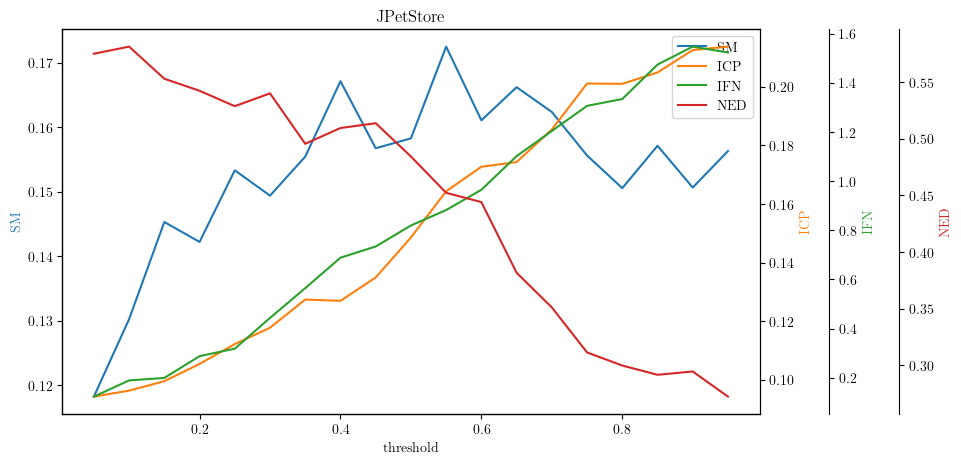

In [3]:
fig, ax = plt.subplots()
ax.set_title("JPetStore")
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["SM"], "-C0", label="SM")
p2, = twin1.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["ICP"], "-C1", label="ICP")
p3, = twin2.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["IFN"], "-C2", label="IFN")
p4, = twin3.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["NED"], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

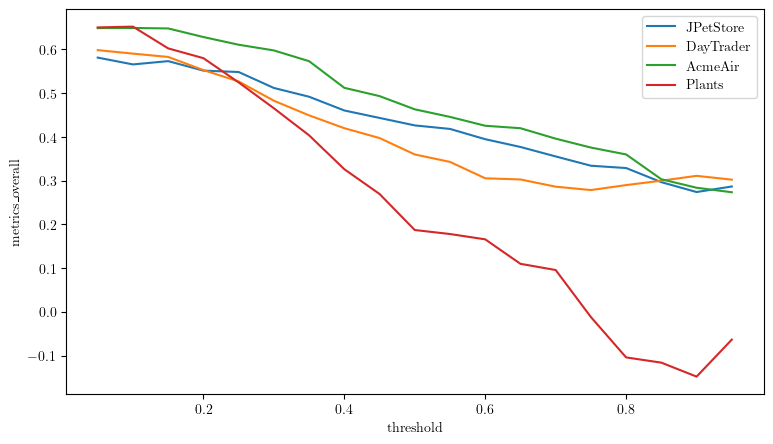

In [4]:
projects_overall = {proj: df["overall"] for proj, df in df_dict.items()}
projects_overall["threshold"] = df_dict["JPetStore"]["threshold"]
projects_overall = pd.DataFrame(projects_overall).set_index("threshold")
ax = projects_overall.plot(ylabel="metrics_overall")  # colormap="crest")
ax.get_figure().savefig("OverallLineChart.pdf", bbox_inches="tight")

In [5]:
projects_overall
# 0.05 - 0.25

,JPetStore,DayTrader,AcmeAir,Plants
threshold,,,,
0.05,0.581411,0.598484,0.648907,0.650454
0.10,0.565823,0.590522,0.649252,0.652284
0.15,0.573371,0.582940,0.648120,0.602503
0.20,0.551620,0.552862,0.628467,0.580119
0.25,0.548469,0.526904,0.610863,0.524714
0.30,0.511979,0.482821,0.597857,0.465554
0.35,0.491928,0.449286,0.573252,0.403640
0.40,0.460479,0.419956,0.512316,0.326188
0.45,0.443441,0.397419,0.493345,0.269512
